This is a notebook to recreate Figure 6 of Lamb & Taylor 2023. This notebook analyses the evolution of spectral parameterisation with number of pulsars and frequency

In [1]:
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format ='retina'

import numpy as np
import matplotlib.pyplot as plt
import glob
from chainconsumer import ChainConsumer
import pickle
from ceffyl import Ceffyl, models
from enterprise.signals import parameter, gp_priors as gpp
from enterprise_extensions.model_utils import get_tspan
from la_forge.slices import SlicesCore
import json

# ACCRE-specific import to load correct latex file
## COMMENT OUT AS REQUIRED
import os
os.environ["PATH"] += os.pathsep + '/home/lambwg/latex/bin/x86_64-linux' 

In [2]:
# setup default plotting code
plt.rcParams.update(plt.rcParamsDefault)
with open('/home/lambwg/ng15_rcparams.json', 'rb') as fin:
    plt.rcParams.update(json.load(fin))
    
plt.rcParams["figure.figsize"] = [3.5503666805036667*2, 2.1942472810764047*2]

In [3]:
# load injected values
inj = np.loadtxt('../../data/sim51/injected_values.txt')

# load all the chains!

## credible regions as a function of $N_\mathrm{f}$

I ran some refits for increasing numbers of frequencies. This is trivial with ceffyl and left as an exercise :)

##### free spectrum refit

In [3]:
# load paths to files of chains from FREE SPECTRUM REFIT
chains = [f'/data/taylor_group/william_lamb/GFL/middleton21/freespec10f/realisation_51/fftkde_10k_2/refits/m2aperfreq/{ii}f/'
          for ii in range(1,11)]

params = [f'{ii}f' for ii in range(1,11)]  # label chains

# use la_forge's SlicesCore class to only load log10_A and gamma
log10Afs = SlicesCore(slicedirs=chains, pars2pull='log10_A_gw',
                     params=params)
gammafs = SlicesCore(slicedirs=chains, pars2pull='gamma_gw',
                     params=params)

# calculate credible regions of the posterior
q2p5Afs, q16Afs, q50Afs, q84Afs, q97p5Afs = np.percentile(log10Afs(params),
                                                          [2.5, 16, 50, 84, 97.5],
                                                          axis=0)
q2p5gfs, q16gfs, q50gfs, q84gfs, q97p5gfs = np.percentile(gammafs(params),
                                                          [2.5, 16, 50, 84, 97.5],
                                                          axis=0)

/data/taylor_group/william_lamb/GFL/middleton21/freespec10f/realisation_51/fftkde_10k_2/refits/m2aperfreq/10f//chain_1.txt is loaded.

/data/taylor_group/william_lamb/GFL/middleton21/freespec10f/realisation_51/fftkde_10k_2/refits/m2aperfreq/10f//chain_1.txt is loaded.



In [7]:
# load paths to files of chains from FREE SPECTRUM REFIT
chains = [f'/data/taylor_group/william_lamb/GFL/middleton21/freespec10f/realisation_51/fftkde_10k_2/refits/m2aperfreq_down//{ii}f/'
          for ii in range(1,11)]

params = [f'{ii}f' for ii in range(1,11)]  # label chains

# use la_forge's SlicesCore class to only load log10_A and gamma
log10Afsd = SlicesCore(slicedirs=chains, pars2pull='log10_A_gw',
                      params=params)
gammafsd = SlicesCore(slicedirs=chains, pars2pull='gamma_gw',
                      params=params)

# calculate credible regions of the posterior
q2p5Afsd, q16Afsd, q50Afsd, q84Afsd, q97p5Afsd = np.percentile(log10Afsd(params),
                                                               [2.5, 16, 50, 84, 97.5],
                                                               axis=0)
q2p5gfsd, q16gfsd, q50gfsd, q84gfsd, q97p5gfsd = np.percentile(gammafsd(params),
                                                               [2.5, 16, 50, 84, 97.5],
                                                               axis=0)

/data/taylor_group/william_lamb/GFL/middleton21/freespec10f/realisation_51/fftkde_10k_2/refits/m2aperfreq_down//10f//chain_1.txt is loaded.

/data/taylor_group/william_lamb/GFL/middleton21/freespec10f/realisation_51/fftkde_10k_2/refits/m2aperfreq_down//10f//chain_1.txt is loaded.



##### GFL Lite

In [4]:
# load paths to files of chains from GFL LITE
chains = [f'/data/taylor_group/william_lamb/GFL/middleton21/spsrs_10fCP_10firn/realisation_51/fftkde_10000_final/refits/m2aperfreq/{ii}f/'
          for ii in range(1,11)]

params = [f'{ii}f' for ii in range(1,11)]  # create labels for chains

# use la_forge's SlicesCore class to only load log10_A and gamma
log10As = SlicesCore(slicedirs=chains, pars2pull='log10_A_gw',
                     params=params)
gammas = SlicesCore(slicedirs=chains, pars2pull='gamma_gw',
                    params=params)

# calculate credible regions of the posterior
q2p5A, q16A, q50A, q84A, q97p5A = np.percentile(log10As(params),
                                                [2.5, 16, 50, 84, 97.5],
                                                axis=0)
q2p5g, q16g, q50g, q84g, q97p5g = np.percentile(gammas(params),
                                                [2.5, 16, 50, 84, 97.5],
                                                axis=0)

/data/taylor_group/william_lamb/GFL/middleton21/spsrs_10fCP_10firn/realisation_51/fftkde_10000_final/refits/m2aperfreq/10f//chain_1.txt is loaded.

/data/taylor_group/william_lamb/GFL/middleton21/spsrs_10fCP_10firn/realisation_51/fftkde_10000_final/refits/m2aperfreq/10f//chain_1.txt is loaded.



Same but for decreasing numbers of frequencies, from highest to lowest!

In [5]:
# load paths to files of chains from GFL LITE
chains = [f'/data/taylor_group/william_lamb/GFL/middleton21/spsrs_10fCP_10firn/realisation_51/fftkde_10000_final/refits/m2aperfreq_down//{ii}f/'
          for ii in range(1,11)]

params = [f'{ii}f' for ii in range(1,11)]  # labels

# use SlicesCore to load parameters
log10A_down = SlicesCore(slicedirs=chains, pars2pull='log10_A_gw',
                         params=params)
gamma_down = SlicesCore(slicedirs=chains, pars2pull='gamma_gw',
                        params=params)

# calculate credible regions of the posterior
q2p5Ad, q16Ad, q50Ad, q84Ad, q97p5Ad = np.percentile(log10A_down(params),
                                                     [2.5, 16, 50, 84, 97.5],
                                                     axis=0)
q2p5gd, q16gd, q50gd, q84gd, q97p5gd = np.percentile(gamma_down(params),
                                                     [2.5, 16, 50, 84, 97.5],
                                                     axis=0)

/data/taylor_group/william_lamb/GFL/middleton21/spsrs_10fCP_10firn/realisation_51/fftkde_10000_final/refits/m2aperfreq_down//10f//chain_1.txt is loaded.

/data/taylor_group/william_lamb/GFL/middleton21/spsrs_10fCP_10firn/realisation_51/fftkde_10000_final/refits/m2aperfreq_down//10f//chain_1.txt is loaded.



# Plot the figure!

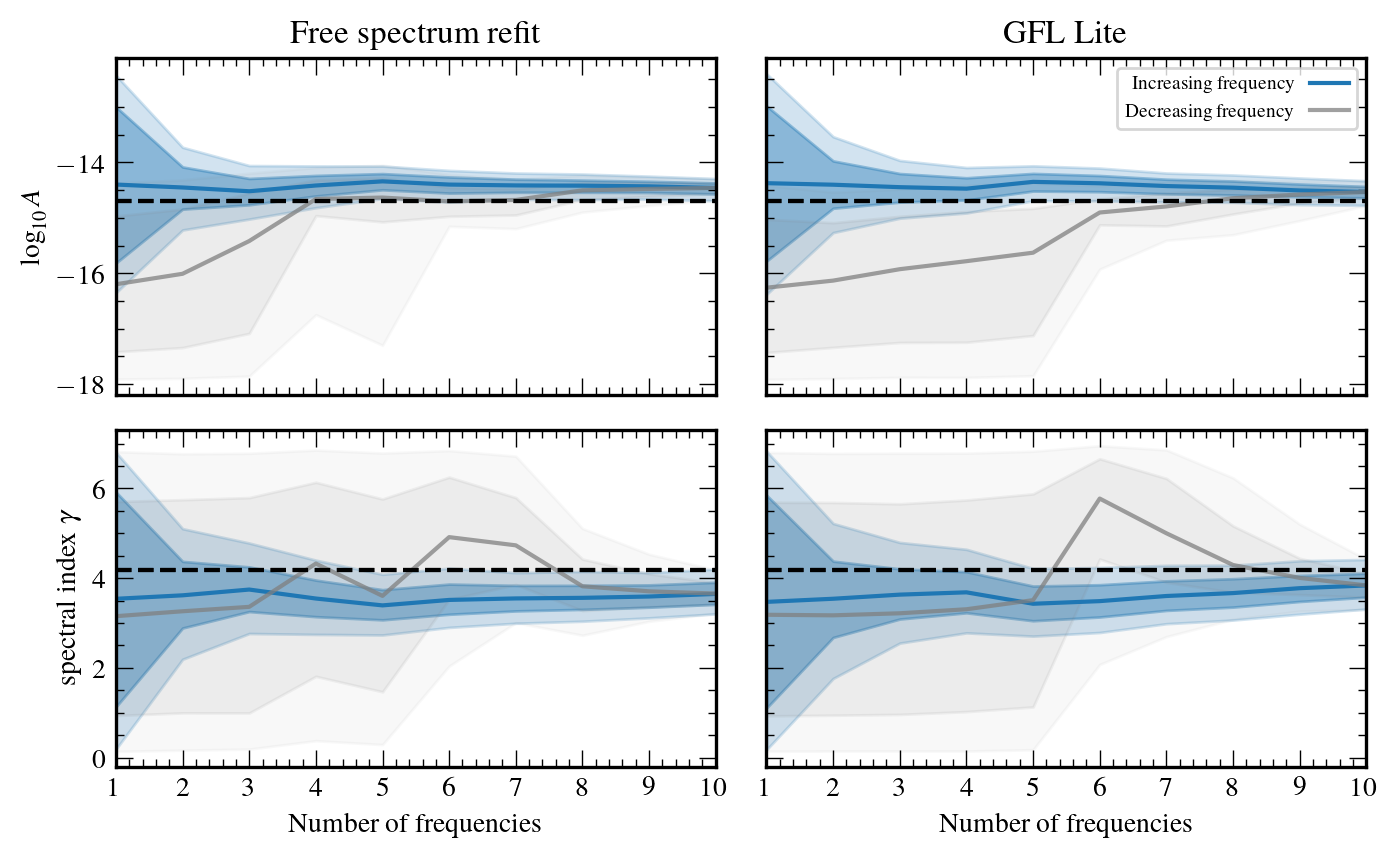

/tmp/ipykernel_175089/328252465.py:68: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterize" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('../plots/per_freq.pdf',


In [16]:
fig, ((ax1, ax2),
      (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, tight_layout=True,
                                 sharex=True, sharey='row')

f = np.arange(1, 11)

ax1.set_title('Free spectrum refit')
ax2.set_title('GFL Lite')

ax1.plot(f, q50Afs, c='C0', label='Increasing frequency')
ax1.fill_between(f, q16Afs, q84Afs, alpha=0.4, color='C0')
ax1.fill_between(f, q2p5Afs, q97p5Afs, alpha=0.2, color='C0')
ax1.axhline(inj[0], c='k', ls='--');

ax3.plot(f, q50gfs, c='C0')
ax3.fill_between(f, q16gfs, q84gfs, alpha=0.4, color='C0')
ax3.fill_between(f, q2p5gfs, q97p5gfs, alpha=0.2, color='C0')
ax3.axhline(inj[1], c='k', ls='--')

ax1.plot(f, q50Afsd, c='grey', label='Decreasing frequency', alpha=0.75)
ax1.fill_between(f, q16Afsd, q84Afsd, alpha=0.1, color='grey')
ax1.fill_between(f, q2p5Afsd, q97p5Afsd, alpha=0.05, color='grey')
ax1.axhline(inj[0], c='k', ls='--');

ax3.plot(f, q50gfsd, c='grey', alpha=0.75)
ax3.fill_between(f, q16gfsd, q84gfsd, alpha=0.1, color='grey')
ax3.fill_between(f, q2p5gfsd, q97p5gfsd, alpha=0.05, color='grey')
ax3.axhline(inj[1], c='k', ls='--')

ax1.set_xlim(1,10)

ax2.plot(f, q50A, color='C0', label='Increasing frequency')
ax2.fill_between(f, q16A, q84A, alpha=0.4, color='C0')
ax2.fill_between(f, q2p5A, q97p5A, alpha=0.2, color='C0')
ax2.axhline(inj[0], c='k', ls='--');

ax4.plot(f, q50g, color='C0')
ax4.fill_between(f, q16g, q84g, alpha=0.4, color='C0')
ax4.fill_between(f, q2p5g, q97p5g, alpha=0.2, color='C0')
ax4.axhline(inj[1], c='k', ls='--')

ax2.plot(f, q50Ad, color='grey', alpha=0.75, label='Decreasing frequency')
ax2.fill_between(f, q16Ad, q84Ad, alpha=0.1, color='grey')
ax2.fill_between(f, q2p5Ad, q97p5Ad, alpha=0.05, color='grey')
ax2.axhline(inj[0], c='k', ls='--');

ax4.plot(f, q50gd, color='grey', alpha=0.75)
ax4.fill_between(f, q16gd, q84gd, alpha=0.1, color='grey')
ax4.fill_between(f, q2p5gd, q97p5gd, alpha=0.05, color='grey')
ax4.axhline(inj[1], c='k', ls='--')

ax3.set_xlabel('Number of frequencies')
ax4.set_xlabel('Number of frequencies')

ax3.set_xticks(np.arange(1, 11))
ax4.set_xticks(np.arange(1, 11))

ax1.set_ylabel('$\log_{10}A$')
ax3.set_ylabel('spectral index $\gamma$')

#ax4.set_xticks(ticks=np.arange(1,11),
#               labels=[f'{ii}/T' for ii in range(1,11)])

ax3.set_xlim(1,10)
ax2.legend(markerfirst=False);

plt.show();
fig.savefig('../plots/per_freq.pdf',
            dpi=400, bbox_inches='tight',
            rasterize=True);

# credible regions as a function of $N_p$

Same as above, but increasing number of pulsars. Number of pulsars increased by adding longest or shortest timed pulsars

## load the data!

In [4]:
datadir = '/data/taylor_group/william_lamb/GFL/middleton21/spsrs_10fCP_10firn/realisation_51/fftkde_10000_final/'

downA = SlicesCore(slicedirs=[datadir+f'refits/m2aNpsr_down/{ii}psr/' for ii in range(1, 46)],
                   params=[f'{ii}psr' for ii in range(1, 46)], pars2pull=['log10_A_gw'])
downg = SlicesCore(slicedirs=[datadir+f'refits/m2aNpsr_down/{ii}psr/' for ii in range(1, 46)],
                   params=[f'{ii}psr' for ii in range(1, 46)], pars2pull=['gamma_gw'])
upA = SlicesCore(slicedirs=[datadir+f'refits/m2aNpsr_up/{ii}psr/' for ii in range(1, 46)],
                 params=[f'{ii}psr' for ii in range(1, 46)], pars2pull=['log10_A_gw'])
upg = SlicesCore(slicedirs=[datadir+f'refits/m2aNpsr_up/{ii}psr/' for ii in range(1, 46)],
                 params=[f'{ii}psr' for ii in range(1, 46)], pars2pull=['gamma_gw'])

params=[f'{ii}psr' for ii in range(1, 46)]

q2p5Aup, q16Aup, q50Aup, q84Aup, q97p5Aup = np.percentile(upA(params),
                                                          [2.5, 16, 50, 84, 97.5], axis=0)
q2p5gup, q16gup, q50gup, q84gup, q97p5gup = np.percentile(upg(params),
                                                          [2.5, 16, 50, 84, 97.5], axis=0)

q2p5Adown, q16Adown, q50Adown, q84Adown, q97p5Adown = np.percentile(downA(params),
                                                          [2.5, 16, 50, 84, 97.5], axis=0)
q2p5gdown, q16gdown, q50gdown, q84gdown, q97p5gdown = np.percentile(downg(params),
                                                          [2.5, 16, 50, 84, 97.5], axis=0)

/data/taylor_group/william_lamb/GFL/middleton21/spsrs_10fCP_10firn/realisation_51/fftkde_10000_final/refits/m2aNpsr_down/45psr//chain_1.txt is loaded.

/data/taylor_group/william_lamb/GFL/middleton21/spsrs_10fCP_10firn/realisation_51/fftkde_10000_final/refits/m2aNpsr_down/45psr//chain_1.txt is loaded.

/data/taylor_group/william_lamb/GFL/middleton21/spsrs_10fCP_10firn/realisation_51/fftkde_10000_final/refits/m2aNpsr_up/45psr//chain_1.txt is loaded.

/data/taylor_group/william_lamb/GFL/middleton21/spsrs_10fCP_10firn/realisation_51/fftkde_10000_final/refits/m2aNpsr_up/45psr//chain_1.txt is loaded.



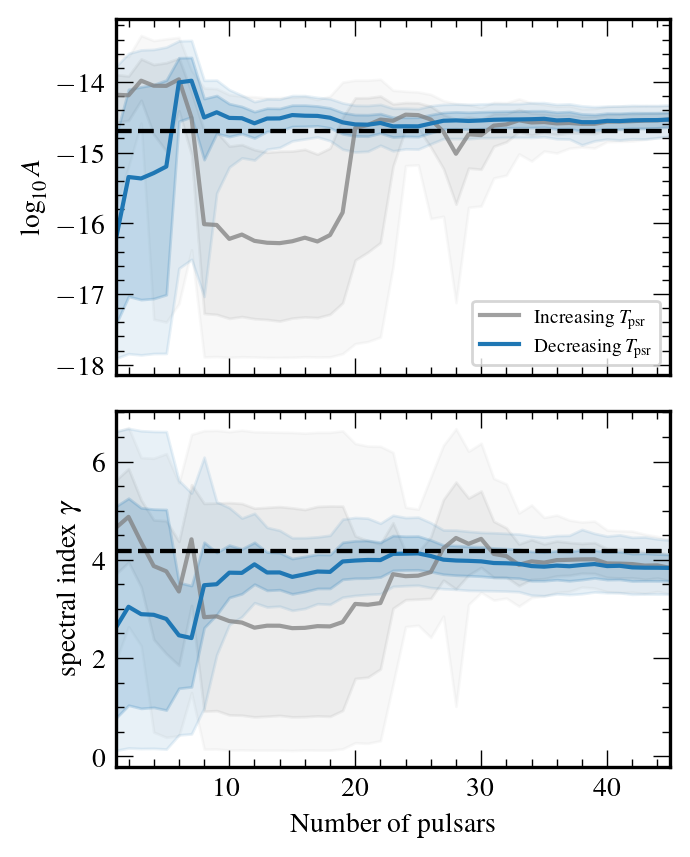

/tmp/ipykernel_175089/790914539.py:36: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterize" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('../plots/per_psr.pdf',


In [22]:
plt.rcParams["figure.figsize"] = [3.5503666805036667, 2.1942472810764047*2]
p = np.arange(1, 46)
fig, (ax1, ax2) = plt.subplots(nrows=2, tight_layout=True,
                               sharex=True)

ax1.plot(p, q50Aup, color='grey', label='Increasing $T_\mathrm{psr}$',
         alpha=0.75)
ax1.fill_between(p, q16Aup, q84Aup, alpha=0.1, color='grey')
ax1.fill_between(p, q2p5Aup, q97p5Aup, alpha=0.05, color='grey')
ax1.axhline(inj[0], c='k', ls='--');

ax2.plot(p, q50gup, color='grey', alpha=0.75)
ax2.fill_between(p, q16gup, q84gup, alpha=0.1, color='grey')
ax2.fill_between(p, q2p5gup, q97p5gup, alpha=0.05, color='grey')
ax2.axhline(inj[1], c='k', ls='--')

ax1.plot(p, q50Adown, label='Decreasing $T_\mathrm{psr}$',
         c='C0', alpha=1)
ax1.fill_between(p, q16Adown, q84Adown, alpha=0.2, color='C0')
ax1.fill_between(p, q2p5Adown, q97p5Adown, alpha=0.1, color='C0')
ax1.axhline(inj[0], c='k', ls='--');

ax2.plot(p, q50gdown, c='C0')
ax2.fill_between(p, q16gdown, q84gdown, alpha=0.2, color='C0')
ax2.fill_between(p, q2p5gdown, q97p5gdown, alpha=0.1, color='C0')
ax2.axhline(inj[1], c='k', ls='--')

ax2.set_xlabel('Number of pulsars')
ax1.set_ylabel('$\log_{10}A$')
ax2.set_ylabel('spectral index $\gamma$')

ax1.set_xlim(1,45)
ax1.legend(loc='lower right')

plt.show();
fig.savefig('../plots/per_psr.pdf',
            dpi=400, bbox_inches='tight',
            rasterize=True);

# Let's do the 12.5yr data set!

In [5]:
# load paths to files of chains from FREE SPECTRUM REFIT
chains = [f'/data/taylor_group/william_lamb/analyses/NANOGrav/NG12p5/freespec/30fCP_30fiRN_2A_wf/densities/refits/m2aperfreq/{ii}f/'
          for ii in range(1,31)]

params = [f'{ii}f' for ii in range(1,31)]  # label chains

# use la_forge's SlicesCore class to only load log10_A and gamma
log10Afs_125 = SlicesCore(slicedirs=chains, pars2pull='log10_A_gw',
                          params=params)
gammafs_125 = SlicesCore(slicedirs=chains, pars2pull='gamma_gw',
                         params=params)

# calculate credible regions of the posterior
q2p5Afs, q16Afs, q50Afs, q84Afs, q97p5Afs = np.percentile(log10Afs_125(params),
                                                          [2.5, 16, 50, 84, 97.5],
                                                          axis=0)
q2p5gfs, q16gfs, q50gfs, q84gfs, q97p5gfs = np.percentile(gammafs_125(params),
                                                          [2.5, 16, 50, 84, 97.5],
                                                          axis=0)

/data/taylor_group/william_lamb/analyses/NANOGrav/NG12p5/freespec/30fCP_30fiRN_2A_wf/densities/refits/m2aperfreq/30f//chain_1.txt is loaded.

/data/taylor_group/william_lamb/analyses/NANOGrav/NG12p5/freespec/30fCP_30fiRN_2A_wf/densities/refits/m2aperfreq/30f//chain_1.txt is loaded.



In [6]:
# load paths to files of chains from FREE SPECTRUM REFIT
chains = [f'/data/taylor_group/william_lamb/analyses/NANOGrav/NG12p5/freespec/30fCP_30fiRN_2A_wf/densities/refits/m2aperfreq_down/{ii}f/'
          for ii in range(1,31)]

params = [f'{ii}f' for ii in range(1,31)]  # label chains

# use la_forge's SlicesCore class to only load log10_A and gamma
log10Afsd_125 = SlicesCore(slicedirs=chains, pars2pull='log10_A_gw',
                          params=params)
gammafsd_125 = SlicesCore(slicedirs=chains, pars2pull='gamma_gw',
                         params=params)

# calculate credible regions of the posterior
q2p5Afsd, q16Afsd, q50Afsd, q84Afsd, q97p5Afsd = np.percentile(log10Afsd_125(params),
                                                               [2.5, 16, 50, 84, 97.5],
                                                               axis=0)
q2p5gfsd, q16gfsd, q50gfsd, q84gfsd, q97p5gfsd = np.percentile(gammafsd_125(params),
                                                               [2.5, 16, 50, 84, 97.5],
                                                               axis=0)

/data/taylor_group/william_lamb/analyses/NANOGrav/NG12p5/freespec/30fCP_30fiRN_2A_wf/densities/refits/m2aperfreq_down/30f//chain_1.txt is loaded.

/data/taylor_group/william_lamb/analyses/NANOGrav/NG12p5/freespec/30fCP_30fiRN_2A_wf/densities/refits/m2aperfreq_down/30f//chain_1.txt is loaded.



In [7]:
datadir = '/data/taylor_group/william_lamb/analyses/NANOGrav/NG12p5/spsrs/30fCP_WNvary_wf/densities/'

params2 = [f'{ii}psr' for ii in range(1, 46)]

downA_125 = SlicesCore(slicedirs=[datadir+f'refits/m2aNpsr_down/{ii}psr/' for ii in range(1, 46)],
                   params=params2, pars2pull=['log10_A_gw'])
downg_125 = SlicesCore(slicedirs=[datadir+f'refits/m2aNpsr_down/{ii}psr/' for ii in range(1, 46)],
                   params=params2, pars2pull=['gamma_gw'])

params=[f'{ii}psr' for ii in range(1, 46)]

q2p5Adown, q16Adown, q50Adown, q84Adown, q97p5Adown = np.percentile(downA_125(params),
                                                                    [2.5, 16, 50, 84, 97.5], axis=0)
q2p5gdown, q16gdown, q50gdown, q84gdown, q97p5gdown = np.percentile(downg_125(params),
                                                                    [2.5, 16, 50, 84, 97.5], axis=0)

/data/taylor_group/william_lamb/analyses/NANOGrav/NG12p5/spsrs/30fCP_WNvary_wf/densities/refits/m2aNpsr_down/45psr//chain_1.txt is loaded.

/data/taylor_group/william_lamb/analyses/NANOGrav/NG12p5/spsrs/30fCP_WNvary_wf/densities/refits/m2aNpsr_down/45psr//chain_1.txt is loaded.



In [8]:
datadir = '/data/taylor_group/william_lamb/analyses/NANOGrav/NG12p5/spsrs/30fCP_WNvary_wf/densities/'

params2 = [f'{ii}psr' for ii in range(1, 46)]

upA_125 = SlicesCore(slicedirs=[datadir+f'refits/m2aNpsr_up/{ii}psr/' for ii in range(1, 46)],
                     params=params2, pars2pull=['log10_A_gw'])
upg_125 = SlicesCore(slicedirs=[datadir+f'refits/m2aNpsr_up/{ii}psr/' for ii in range(1, 46)],
                     params=params2, pars2pull=['gamma_gw'])

params=[f'{ii}psr' for ii in range(1, 46)]

q2p5Aup, q16Aup, q50Aup, q84Aup, q97p5Aup = np.percentile(upA_125(params2),
                                                          [2.5, 16, 50, 84, 97.5], axis=0)
q2p5gup, q16gup, q50gup, q84gup, q97p5gup = np.percentile(upg_125(params2),
                                                          [2.5, 16, 50, 84, 97.5], axis=0)

/data/taylor_group/william_lamb/analyses/NANOGrav/NG12p5/spsrs/30fCP_WNvary_wf/densities/refits/m2aNpsr_up/45psr//chain_1.txt is loaded.

/data/taylor_group/william_lamb/analyses/NANOGrav/NG12p5/spsrs/30fCP_WNvary_wf/densities/refits/m2aNpsr_up/45psr//chain_1.txt is loaded.



In [9]:
plt.rcParams["figure.figsize"] = [3.5503666805036667*2, 2.1942472810764047*2]

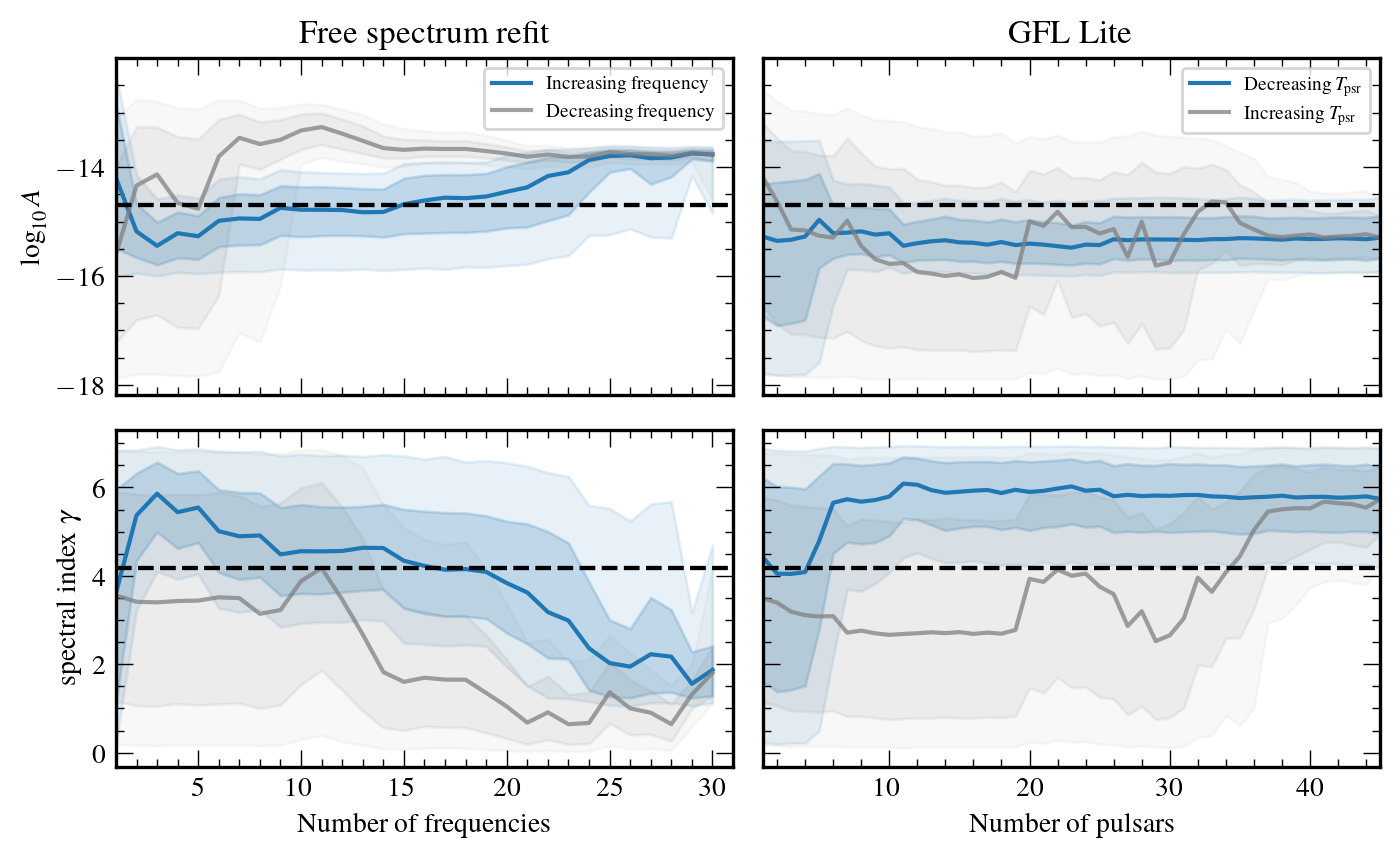

In [10]:
fig, ((ax1, ax2),
      (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, tight_layout=True,
                                 sharey='row', sharex='col')

f = np.arange(1,31)
p = np.arange(1,46)

ax1.set_title('Free spectrum refit')
ax2.set_title('GFL Lite')

ax1.plot(f, q50Afs, c='C0', label='Increasing frequency')
ax1.fill_between(f, q16Afs, q84Afs, alpha=0.2, color='C0')
ax1.fill_between(f, q2p5Afs, q97p5Afs, alpha=0.1, color='C0')
ax1.axhline(inj[0], c='k', ls='--');

ax3.plot(f, q50gfs, c='C0')
ax3.fill_between(f, q16gfs, q84gfs, alpha=0.2, color='C0')
ax3.fill_between(f, q2p5gfs, q97p5gfs, alpha=0.1, color='C0')
ax3.axhline(inj[1], c='k', ls='--')

ax1.plot(f, q50Afsd, c='grey', alpha=0.75,
         label='Decreasing frequency')
ax1.fill_between(f, q16Afsd, q84Afsd, alpha=0.1, color='grey')
ax1.fill_between(f, q2p5Afsd, q97p5Afsd, alpha=0.05, color='grey')
ax1.axhline(inj[0], c='k', ls='--');

ax3.plot(f, q50gfsd, c='grey', alpha=0.75)
ax3.fill_between(f, q16gfsd, q84gfsd, alpha=0.1, color='grey')
ax3.fill_between(f, q2p5gfsd, q97p5gfsd, alpha=0.05, color='grey')
ax3.axhline(inj[1], c='k', ls='--')

ax1.set_xlim(1,31)
ax1.legend(loc='upper right');

ax2.plot(p, q50Adown, color='C0', label='Decreasing $T_\mathrm{psr}$')
ax2.fill_between(p, q16Adown, q84Adown, alpha=0.2, color='C0')
ax2.fill_between(p, q2p5Adown, q97p5Adown, alpha=0.1, color='C0')
ax2.axhline(inj[0], c='k', ls='--');

ax4.plot(p, q50gdown, color='C0')
ax4.fill_between(p, q16gdown, q84gdown, alpha=0.2, color='C0')
ax4.fill_between(p, q2p5gdown, q97p5gdown, alpha=0.1, color='C0')
ax4.axhline(inj[1], c='k', ls='--')

ax2.plot(p, q50Aup, color='grey', alpha=0.75,
         label='Increasing $T_\mathrm{psr}$')
ax2.fill_between(p, q16Aup, q84Aup, alpha=0.1, color='grey')
ax2.fill_between(p, q2p5Aup, q97p5Aup, alpha=0.05, color='grey')
ax2.axhline(inj[0], c='k', ls='--');

ax4.plot(p, q50gup, color='grey', alpha=0.75)
ax4.fill_between(p, q16gup, q84gup, alpha=0.1, color='grey')
ax4.fill_between(p, q2p5gup, q97p5gup, alpha=0.05, color='grey')
ax4.axhline(inj[1], c='k', ls='--')

ax3.set_xlabel('Number of frequencies')
ax4.set_xlabel('Number of pulsars')
ax1.set_ylabel('$\log_{10}A$')
ax3.set_ylabel('spectral index $\gamma$')

ax2.set_xlim(1,45)
ax2.legend(loc='upper right')

#ax3.set_xlim(1,30)

fig.savefig('../plots/per_freq_12p5.pdf',
            dpi=400, bbox_inches='tight');

plt.show();